Step 1: Import modules for the notebook

In [3]:
# Import libarries needed for this notbook
import numpy as np  #Linear algebra
import pandas as pd #Data processing
# Data visualization
import matplotlib.pyplot as plt
# Natural language processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
# Word count
from collections import Counter
# Preprocessing (sklearn)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Modeling
from sklearn import svm
# Scoring
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
# Export model
import pickle

[nltk_data] Downloading package stopwords to C:\Users\Anh Duc
[nltk_data]     Ha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anh Duc
[nltk_data]     Ha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anh Duc
[nltk_data]     Ha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Anh Duc
[nltk_data]     Ha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Step 2: Prepare the data

Import spam dataset from Kaggle (spam.csv) 
Link to dataset: https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

In [4]:
# Import the dataset to notebook
spam_dataset = pd.read_csv('spam.csv')

In [5]:
# Inspect the dataset
spam_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Print the first 10 lines in the dataset
spam_dataset.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Remove duplicated tuples
spam_dataset.drop_duplicates(inplace= True)
# Check the dataset of the removing duplicates
spam_dataset.shape

(5157, 2)

Step 3: Data Pre-processing

In [8]:
# Text cleaning function
def handle_message(message): 
  # Step 1: Remove puntuation 
  message1 = [char for char in message if char not in string.punctuation]
  message1 = ''.join(message1)
  # Step 2: Remove stop word
  message2 = [word for word in message1.split() if word.lower() not in stopwords.words('english')]
  message2 = ' '.join(message2)
  # Step 3: Lemmatization
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(message2)
  result = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  return result.lower() # Lower casing the processed message

In [9]:
# Tokenization
x = spam_dataset['Message'].apply(handle_message)
y = spam_dataset["Category"].values
# Partitioning the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

In [10]:
# Feature extraction
cv = CountVectorizer()
train_feature = cv.fit_transform(x_train)
test_feature = cv.transform(x_test)

Step 4: Model Training and Evaluation

In [11]:
# Model training
model = svm.LinearSVC()
model.fit(train_feature,y_train)

d:\UniversityWork\Projects\spamfilter\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

Accuracy: 1.0

Classification report: 

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3176
        spam       1.00      1.00      1.00       433

    accuracy                           1.00      3609
   macro avg       1.00      1.00      1.00      3609
weighted avg       1.00      1.00      1.00      3609

Confusion matrix (0 is ham and 1 is spam): 



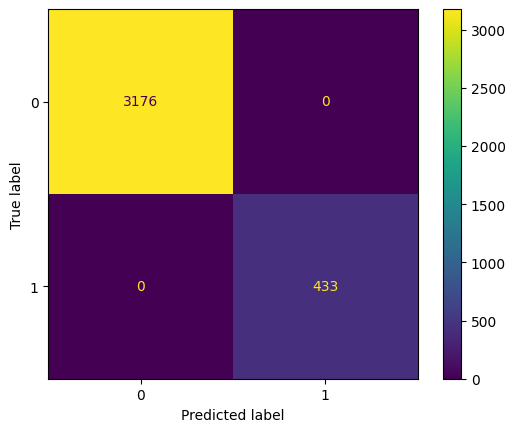

In [12]:
# Train evaluation
prediction = model.predict(train_feature)
print("Accuracy: {}".format(model.score(train_feature,y_train)))
print('\nClassification report: \n')
print(classification_report(y_train, prediction))
print('Confusion matrix (0 is ham and 1 is spam): \n')
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix(prediction,y_train))
confusion_matrix_plot.plot()
plt.show()

Accuracy: 0.9715762273901809

Classification report: 

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1340
        spam       0.97      0.81      0.88       208

    accuracy                           0.97      1548
   macro avg       0.97      0.90      0.93      1548
weighted avg       0.97      0.97      0.97      1548

Confusion matrix (0 is ham and 1 is spam): 



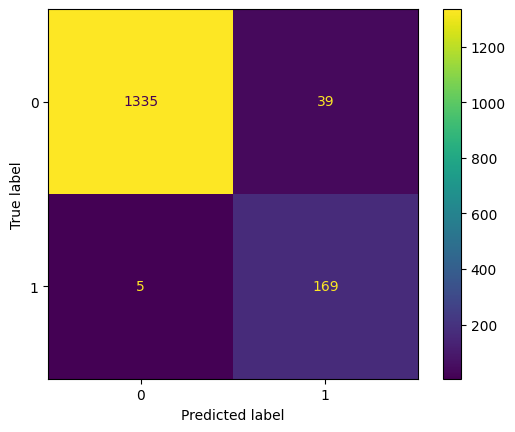

In [13]:
# Test detail
prediction = model.predict(test_feature)
print("Accuracy: {}".format(model.score(test_feature,y_test)))
print('\nClassification report: \n')
print(classification_report(y_test, prediction))
print('Confusion matrix (0 is ham and 1 is spam): \n')
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix(prediction,y_test))
confusion_matrix_plot.plot()
plt.show()

Step 5: Data analysis and visualiazation 

Category
ham     4516
spam     641
dtype: int64


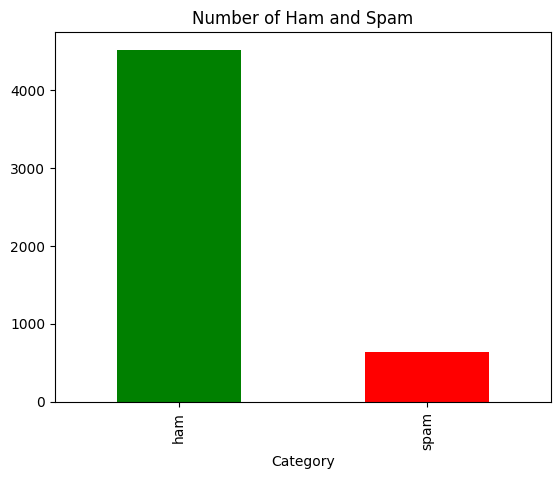

In [14]:
count_Class = spam_dataset.value_counts(spam_dataset["Category"], sort = True) # Count spam email and ham (non-spam) emails
print(count_Class)   # Print the counts
# Visualise the data using bar chart
count_Class.plot(kind = 'bar', color =["green", "red"])
plt.title('Number of Ham and Spam')
plt.show()

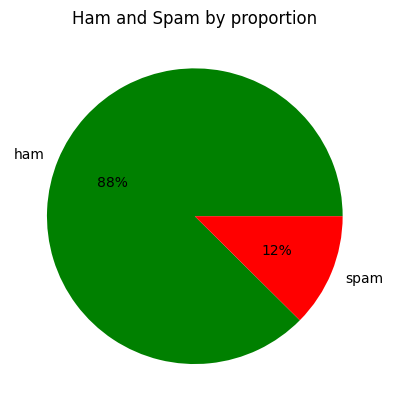

In [15]:
# Visualize the data using pie chart
count_Class.plot(kind = 'pie', autopct='%1.0f%%',  colors =["green", "red"])
plt.title('Ham and Spam by proportion')
plt.ylabel('')
plt.show()

In [16]:
# Prepare the data for visualization of text
# Word count in ham (non-spam) emails
ham_message = (handle_message(" ".join(spam_dataset[spam_dataset['Category']=='ham']["Message"]))) 
count1 = Counter(ham_message.split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "Words in non-spam", 1 : "Count"})
# Word count in spam emails
spam_message = (handle_message(" ".join(spam_dataset[spam_dataset['Category']=='spam']["Message"])))
count2 = Counter(spam_message.split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "Words in spam", 1 : "Count"})

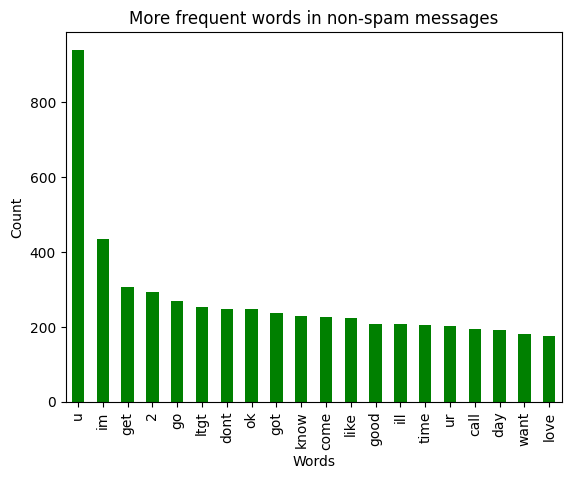

In [17]:
# Visualize word count in ham (non-spam) messages
df1.plot.bar(legend = False, color = 'green')
y_pos = np.arange(len(df1["Words in non-spam"]))
plt.xticks(y_pos, df1["Words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

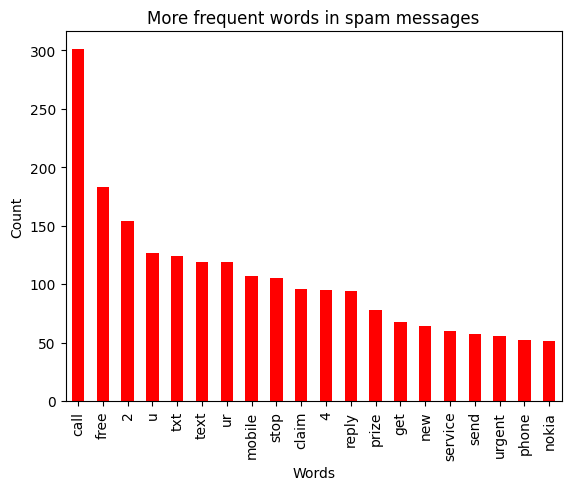

In [18]:
# Visualize word count in spam messages
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["Words in spam"]))
plt.xticks(y_pos, df2["Words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

Step 6: Export models

In [19]:
# Export models
filename = "saved_model.pkl"
with open(filename, 'wb') as fout:
  pickle.dump((model, cv), fout) 